In [59]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [61]:
data = pd.read_csv("/content/drive/MyDrive/Email Spam/emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [62]:
data.shape

(5728, 2)

In [63]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [64]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [65]:
import seaborn as sns

<Axes: ylabel='count'>

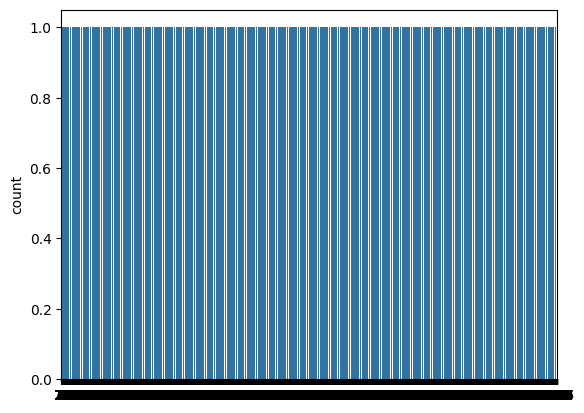

In [66]:
sns.countplot(data['spam'])

In [67]:
data.duplicated().sum()

33

In [68]:
data.drop_duplicates(inplace=True)

In [69]:
data.duplicated().sum()

0

In [70]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [71]:
data.shape

(5695, 2)

In [72]:
5728 - 33

5695

<Axes: ylabel='count'>

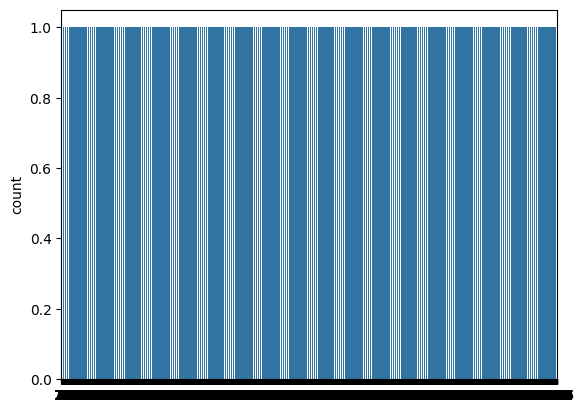

In [73]:
sns.countplot(data['spam'])

In [74]:
data['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

# Separate in X and Y

In [75]:
X = data['text'].values
y = data['spam'].values

In [76]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Train - Test split

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [78]:
X_train.shape

(4556,)

In [79]:
X_test.shape

(1139,)

In [80]:
y_train.shape

(4556,)

In [81]:
y_test.shape

(1139,)

# Preprocessing

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [84]:
x_train.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
len(x_train.toarray())

4556

In [86]:
len(x_train.toarray()[0])

33126

# Training by ML Algorithm

In [87]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [89]:
nb.fit(x_train, y_train)

MultinomialNB()

In [90]:
x_test = cv.transform(X_test)

In [91]:
len(x_test.toarray())

1139

In [92]:
len(x_test.toarray()[0])

33126

In [93]:
y_pred = nb.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.990342405618964

In [96]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.995171202809482

# Lets test using some emails

In [97]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']

In [98]:
clean_email = cv.transform(email)

In [99]:
len(clean_email.toarray()[0])

33126

In [100]:
check = nb.predict(clean_email)[0]

In [101]:
check

0

# Evaluation Function

In [102]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!
